<a href="https://colab.research.google.com/github/Yash-Kamtekar/Optional_Assignment/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing all necessary libraries.

In [13]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

load the wine dataset from sklearn

In [14]:
wine_data = load_wine()
data = pd.DataFrame(data = wine_data.data, columns = wine_data.feature_names)
X = data.values
y = wine_data.target
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Checking the shape of the data frame.

In [15]:
X.shape

(178, 13)

Data Transforming.

In [16]:
from sklearn.preprocessing import normalize

data_scaled = normalize(X)
data_scaled = pd.DataFrame(data_scaled, columns = data.columns)
data_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753


Transform the data.

In [17]:
pca = PCA(2)

X_tranformed = pca.fit_transform(data_scaled)

In [18]:
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    # Randomly choosing Centroids 
    centroids = x[idx, :]

    # finding the distance between centroids and all the data points
    distances = cdist(x, centroids, 'euclidean')

    # Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances])

    # Repeating the above steps for a defined number of iterations
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            # Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)

        # Updated Centroids 
        centroids = np.vstack(centroids)

        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points

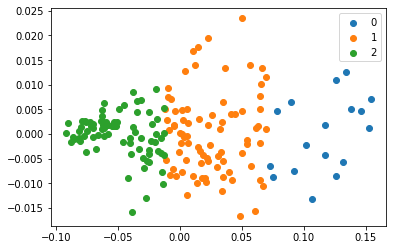

In [19]:
label = kmeans(X_tranformed, 3, 1000)
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(X_tranformed[label == i , 0] , X_tranformed[label == i , 1] , label = i)
plt.legend()
plt.show()